<a href="https://colab.research.google.com/github/nisha1365/GEN-AI-POC/blob/main/Pediatric_BTM__with_conversation_ID_14th_March.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweet-preprocessor

In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 17.8 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.5 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039283 sha256=8f349110e73f07146521786f1721ffd338e95909dd6ee94fba7b542e14ed745d
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
# import tweet preprocessor
import preprocessor as p

import nltk
import gensim
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from bertopic import BERTopic
#from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN
#from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from bertopic.vectorizers import ClassTfidfTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
data= pd.read_csv("/content/grouped_tweets_with_conversation_id_cleaned_tweet.csv")
data

,conversation_id,author_id,tweet_id,text,created_at
0,4.550000e+17,1.411000e+18,1.753020e+18,@kelseyfisher0 Hey I wanted to ask did you hav...,2024-02-01T11:39:39+00:00
1,8.520000e+17,1.005736e+08,1.722770e+18,@rugbyrhino16 @kfunk937 @immunotoxPhD @rosemar...,2023-11-10T00:20:05+00:00
2,NaN,7.587540e+17,1.722820e+18,@Monstercoyliar @krebiozen @kfunk937 @immunoto...,2023-11-10T03:24:40+00:00
3,NaN,4.611509e+09,1.740640e+18,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,2023-12-29T07:51:17+00:00
4,NaN,1.167802e+08,1.740740e+18,@BGLTHMND @crabb_vicki @krebiozen @Scary7Dr @g...,2023-12-29T14:03:17+00:00
...,...,...,...,...,...
28006,NaN,1.573180e+18,1.767050e+18,@_EyushVick @hourly_shitpost You guys in burge...,2024-03-11T04:46:00+00:00
28007,NaN,4.614195e+09,1.767050e+18,‘The unfortunate part of the low vaccination r...,2024-03-11T05:05:44+00:00
28008,NaN,5.023020e+08,1.767060e+18,@pleasedpookie Vaccination is vital to prevent...,2024-03-11T05:10:15+00:00
28009,NaN,1.069600e+18,1.767060e+18,@BBCWorld The Chinese Communist Party (CCP) ex...,2024-03-11T05:13:05+00:00


In [ ]:
data.columns

Index(['conversation_id', 'author_id', 'tweet_id', 'text', 'created_at'], dtype='object')

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('punkt')

import re
def clean_text(text):

    # Remove mentions (@)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Remove hashtags (#) without removing the word following it
    text = re.sub(r'#(\w+)', r'\1', text)
    # Remove URLs (http/https)
    text = re.sub(r'https?://\S+|www\.\S+|https?\/\/t\.co\/\S+', '', text)
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" # emoticons
                               u"\U0001F300-\U0001F5FF" # symbols & pictographs
                               u"\U0001F680-\U0001F6FF" # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                               u"\U00002500-\U00002BEF" # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f" # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = re.sub(emoji_pattern, '', text)
    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text.strip())
    # Convert text to lowercase
    text = text.lower()

    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Remove stopwords from the "clean_text" column
data['clean_text'] = data['text'].apply(clean_text)
data

,conversation_id,author_id,tweet_id,text,created_at,clean_text
0,4.550000e+17,1.411000e+18,1.753020e+18,@kelseyfisher0 Hey I wanted to ask did you hav...,2024-02-01T11:39:39+00:00,hey i wanted to ask did you have to get tetanu...
1,8.520000e+17,1.005736e+08,1.722770e+18,@rugbyrhino16 @kfunk937 @immunotoxPhD @rosemar...,2023-11-10T00:20:05+00:00,no they didn't. the chronology of vaccination ...
2,NaN,7.587540e+17,1.722820e+18,@Monstercoyliar @krebiozen @kfunk937 @immunoto...,2023-11-10T03:24:40+00:00,really? why do thousands of ex-pro-vax parents...
3,NaN,4.611509e+09,1.740640e+18,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,2023-12-29T07:51:17+00:00,parents should sue vicky for disseminating a l...
4,NaN,1.167802e+08,1.740740e+18,@BGLTHMND @crabb_vicki @krebiozen @Scary7Dr @g...,2023-12-29T14:03:17+00:00,i can’t find the tweet where you said dissemin...
...,...,...,...,...,...,...
28006,NaN,1.573180e+18,1.767050e+18,@_EyushVick @hourly_shitpost You guys in burge...,2024-03-11T04:46:00+00:00,you guys in burgerland don't get tetanus shots...
28007,NaN,4.614195e+09,1.767050e+18,‘The unfortunate part of the low vaccination r...,2024-03-11T05:05:44+00:00,‘the unfortunate part of the low vaccination r...
28008,NaN,5.023020e+08,1.767060e+18,@pleasedpookie Vaccination is vital to prevent...,2024-03-11T05:10:15+00:00,vaccination is vital to prevent flu outbreaks ...
28009,NaN,1.069600e+18,1.767060e+18,@BBCWorld The Chinese Communist Party (CCP) ex...,2024-03-11T05:13:05+00:00,the chinese communist party (ccp) exploits its...


In [ ]:
data_tweet = data[['author_id', 'tweet_id', 'text', 'clean_text', 'created_at']]
data_tweet

,author_id,tweet_id,text,clean_text,created_at
0,1.411000e+18,1.753020e+18,@kelseyfisher0 Hey I wanted to ask did you hav...,hey i wanted to ask did you have to get tetanu...,2024-02-01T11:39:39+00:00
1,1.005736e+08,1.722770e+18,@rugbyrhino16 @kfunk937 @immunotoxPhD @rosemar...,no they didn't. the chronology of vaccination ...,2023-11-10T00:20:05+00:00
2,7.587540e+17,1.722820e+18,@Monstercoyliar @krebiozen @kfunk937 @immunoto...,really? why do thousands of ex-pro-vax parents...,2023-11-10T03:24:40+00:00
3,4.611509e+09,1.740640e+18,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,parents should sue vicky for disseminating a l...,2023-12-29T07:51:17+00:00
4,1.167802e+08,1.740740e+18,@BGLTHMND @crabb_vicki @krebiozen @Scary7Dr @g...,i can’t find the tweet where you said dissemin...,2023-12-29T14:03:17+00:00
...,...,...,...,...,...
28006,1.573180e+18,1.767050e+18,@_EyushVick @hourly_shitpost You guys in burge...,you guys in burgerland don't get tetanus shots...,2024-03-11T04:46:00+00:00
28007,4.614195e+09,1.767050e+18,‘The unfortunate part of the low vaccination r...,‘the unfortunate part of the low vaccination r...,2024-03-11T05:05:44+00:00
28008,5.023020e+08,1.767060e+18,@pleasedpookie Vaccination is vital to prevent...,vaccination is vital to prevent flu outbreaks ...,2024-03-11T05:10:15+00:00
28009,1.069600e+18,1.767060e+18,@BBCWorld The Chinese Communist Party (CCP) ex...,the chinese communist party (ccp) exploits its...,2024-03-11T05:13:05+00:00


In [ ]:
import pandas as pd
# Assuming 'created_at' is in string format, convert it to datetime
data_tweet['created_at'] = pd.to_datetime(data_tweet['created_at'], errors = 'coerce')

# Create a new column for the date, time, and day
data_tweet['date'] = data_tweet['created_at'].dt.date
data_tweet['time'] = data_tweet['created_at'].dt.time
data_tweet['day_of_week'] = data_tweet['created_at'].dt.day_name()
# Display the updated DataFrame
data_tweet

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week
0,1.411000e+18,1.753020e+18,@kelseyfisher0 Hey I wanted to ask did you hav...,hey i wanted to ask did you have to get tetanu...,2024-02-01 11:39:39+00:00,2024-02-01,11:39:39,Thursday
1,1.005736e+08,1.722770e+18,@rugbyrhino16 @kfunk937 @immunotoxPhD @rosemar...,no they didn't. the chronology of vaccination ...,2023-11-10 00:20:05+00:00,2023-11-10,00:20:05,Friday
2,7.587540e+17,1.722820e+18,@Monstercoyliar @krebiozen @kfunk937 @immunoto...,really? why do thousands of ex-pro-vax parents...,2023-11-10 03:24:40+00:00,2023-11-10,03:24:40,Friday
3,4.611509e+09,1.740640e+18,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,parents should sue vicky for disseminating a l...,2023-12-29 07:51:17+00:00,2023-12-29,07:51:17,Friday
4,1.167802e+08,1.740740e+18,@BGLTHMND @crabb_vicki @krebiozen @Scary7Dr @g...,i can’t find the tweet where you said dissemin...,2023-12-29 14:03:17+00:00,2023-12-29,14:03:17,Friday
...,...,...,...,...,...,...,...,...
28006,1.573180e+18,1.767050e+18,@_EyushVick @hourly_shitpost You guys in burge...,you guys in burgerland don't get tetanus shots...,2024-03-11 04:46:00+00:00,2024-03-11,04:46:00,Monday
28007,4.614195e+09,1.767050e+18,‘The unfortunate part of the low vaccination r...,‘the unfortunate part of the low vaccination r...,2024-03-11 05:05:44+00:00,2024-03-11,05:05:44,Monday
28008,5.023020e+08,1.767060e+18,@pleasedpookie Vaccination is vital to prevent...,vaccination is vital to prevent flu outbreaks ...,2024-03-11 05:10:15+00:00,2024-03-11,05:10:15,Monday
28009,1.069600e+18,1.767060e+18,@BBCWorld The Chinese Communist Party (CCP) ex...,the chinese communist party (ccp) exploits its...,2024-03-11 05:13:05+00:00,2024-03-11,05:13:05,Monday


In [ ]:
timestamp=data_tweet.created_at.tolist()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join tokens back into a string
    filtered_text = ' '.join(tokens)

    return filtered_text

# Remove stopwords from the "clean_text" column
data_tweet['clean_text'] = data_tweet['clean_text'].apply(remove_stopwords)


In [ ]:
data_tweet

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week
0,1.411000e+18,1.753020e+18,@kelseyfisher0 Hey I wanted to ask did you hav...,hey wanted ask get tetanus vaccine ?,2024-02-01 11:39:39+00:00,2024-02-01,11:39:39,Thursday
1,1.005736e+08,1.722770e+18,@rugbyrhino16 @kfunk937 @immunotoxPhD @rosemar...,n't . chronology vaccination first appearance ...,2023-11-10 00:20:05+00:00,2023-11-10,00:20:05,Friday
2,7.587540e+17,1.722820e+18,@Monstercoyliar @krebiozen @kfunk937 @immunoto...,really ? thousands ex-pro-vax parents continue...,2023-11-10 03:24:40+00:00,2023-11-10,03:24:40,Friday
3,4.611509e+09,1.740640e+18,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,parents sue vicky disseminating ludacris ratio...,2023-12-29 07:51:17+00:00,2023-12-29,07:51:17,Friday
4,1.167802e+08,1.740740e+18,@BGLTHMND @crabb_vicki @krebiozen @Scary7Dr @g...,’ find tweet said disseminated “ ludacris rati...,2023-12-29 14:03:17+00:00,2023-12-29,14:03:17,Friday
...,...,...,...,...,...,...,...,...
28006,1.573180e+18,1.767050e+18,@_EyushVick @hourly_shitpost You guys in burge...,guys burgerland n't get tetanus shots 1yo ? cr...,2024-03-11 04:46:00+00:00,2024-03-11,04:46:00,Monday
28007,4.614195e+09,1.767050e+18,‘The unfortunate part of the low vaccination r...,‘ unfortunate part low vaccination rates detro...,2024-03-11 05:05:44+00:00,2024-03-11,05:05:44,Monday
28008,5.023020e+08,1.767060e+18,@pleasedpookie Vaccination is vital to prevent...,vaccination vital prevent flu outbreaks protec...,2024-03-11 05:10:15+00:00,2024-03-11,05:10:15,Monday
28009,1.069600e+18,1.767060e+18,@BBCWorld The Chinese Communist Party (CCP) ex...,chinese communist party ( ccp ) exploits peopl...,2024-03-11 05:13:05+00:00,2024-03-11,05:13:05,Monday


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

def lemmatize_text(text):
  """Lemmatizes a text.

  Args:
    text: The text to lemmatize.

  Returns:
    The lemmatized text.
  """

  words = nltk.word_tokenize(text)
  lemmas = [nltk.WordNetLemmatizer().lemmatize(word) for word in words]
  return " ".join(lemmas)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
data_tweet['new_lemma_text'] = data_tweet["clean_text"].apply(lemmatize_text)

In [ ]:
data_tweet

,author_id,tweet_id,text,clean_text,created_at,date,time,day_of_week,new_lemma_text
0,1.411000e+18,1.753020e+18,@kelseyfisher0 Hey I wanted to ask did you hav...,hey wanted ask get tetanus vaccine ?,2024-02-01 11:39:39+00:00,2024-02-01,11:39:39,Thursday,hey wanted ask get tetanus vaccine ?
1,1.005736e+08,1.722770e+18,@rugbyrhino16 @kfunk937 @immunotoxPhD @rosemar...,n't . chronology vaccination first appearance ...,2023-11-10 00:20:05+00:00,2023-11-10,00:20:05,Friday,n't . chronology vaccination first appearance ...
2,7.587540e+17,1.722820e+18,@Monstercoyliar @krebiozen @kfunk937 @immunoto...,really ? thousands ex-pro-vax parents continue...,2023-11-10 03:24:40+00:00,2023-11-10,03:24:40,Friday,really ? thousand ex-pro-vax parent continue t...
3,4.611509e+09,1.740640e+18,@cappsie @crabb_vicki @krebiozen @Scary7Dr @ga...,parents sue vicky disseminating ludacris ratio...,2023-12-29 07:51:17+00:00,2023-12-29,07:51:17,Friday,parent sue vicky disseminating ludacris ration...
4,1.167802e+08,1.740740e+18,@BGLTHMND @crabb_vicki @krebiozen @Scary7Dr @g...,’ find tweet said disseminated “ ludacris rati...,2023-12-29 14:03:17+00:00,2023-12-29,14:03:17,Friday,’ find tweet said disseminated “ ludacris rati...
...,...,...,...,...,...,...,...,...,...
28006,1.573180e+18,1.767050e+18,@_EyushVick @hourly_shitpost You guys in burge...,guys burgerland n't get tetanus shots 1yo ? cr...,2024-03-11 04:46:00+00:00,2024-03-11,04:46:00,Monday,guy burgerland n't get tetanus shot 1yo ? craa...
28007,4.614195e+09,1.767050e+18,‘The unfortunate part of the low vaccination r...,‘ unfortunate part low vaccination rates detro...,2024-03-11 05:05:44+00:00,2024-03-11,05:05:44,Monday,‘ unfortunate part low vaccination rate detroi...
28008,5.023020e+08,1.767060e+18,@pleasedpookie Vaccination is vital to prevent...,vaccination vital prevent flu outbreaks protec...,2024-03-11 05:10:15+00:00,2024-03-11,05:10:15,Monday,vaccination vital prevent flu outbreak protect...
28009,1.069600e+18,1.767060e+18,@BBCWorld The Chinese Communist Party (CCP) ex...,chinese communist party ( ccp ) exploits peopl...,2024-03-11 05:13:05+00:00,2024-03-11,05:13:05,Monday,chinese communist party ( ccp ) exploit people...


In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 6.4 MB/s eta 0:00:00


In [ ]:
#Extract embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Reduce dimensionality
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine',random_state=100)

In [ ]:
#Cluster reduced embeddings
hdbscan_model = HDBSCAN(min_cluster_size=15,min_samples = 5, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [ ]:
vectorizer_model = CountVectorizer(stop_words="english")

In [ ]:
ctfidf_model = ClassTfidfTransformer()


In [ ]:
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

representation_model = MaximalMarginalRelevance(diversity=0.3)

topic_model = BERTopic(
  embedding_model=embedding_model,    # Step 1 - Extract embeddings
  umap_model=umap_model,              # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,        # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,  # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,          # Step 5 - Extract topic words
  representation_model=representation_model,
  nr_topics= 'auto',
  low_memory=True,
  n_gram_range=(1, 3),
  calculate_probabilities=True,
  verbose=True,
)

In [ ]:
import time

In [ ]:
tweet_list = data_tweet.new_lemma_text.tolist()

In [ ]:
topics, probs = topic_model.fit_transform(tweet_list)

2024-03-13 11:16:48,159 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/876 [00:00<?, ?it/s]

2024-03-13 11:17:07,490 - BERTopic - Embedding - Completed ✓
2024-03-13 11:17:07,493 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-13 11:18:03,705 - BERTopic - Dimensionality - Completed ✓
2024-03-13 11:18:03,707 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-13 11:19:43,570 - BERTopic - Cluster - Completed ✓
2024-03-13 11:19:43,572 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-13 11:19:49,940 - BERTopic - Representation - Completed ✓
2024-03-13 11:19:49,942 - BERTopic - Topic reduction - Reducing number of topics
2024-03-13 11:19:55,047 - BERTopic - Topic reduction - Reduced number of topics from 230 to 120


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,11670,-1_vaccination_vaccine_vaccinate_kid,"[vaccination, vaccine, vaccinate, kid, pertuss...",[risk child dying cancer 10 15 time higher . m...
1,0,9331,0_measles_vaccination_covid_vaccine,"[measles, vaccination, covid, vaccine, autism,...","[ever measles polio ? tetanus ?, polio , measl..."
2,1,1053,1_tetanus_flu_vaccine_vax,"[tetanus, flu, vaccine, vax, jab, toxoid, covi...","[tetanus vaccine ?, like flu shot , perhaps te..."
3,2,680,2_shot_tetanus_date_hope,"[shot, tetanus, date, hope, feel, paralyzed, w...","[get tetanus shot, tetanus shot, even ’ tetanu..."
4,3,319,3_tetanus_jaw_taste_anus,"[tetanus, jaw, taste, anus, emulating, bigepla...","[give tetanus, u one tetanus n't one, tetanus ..]"
...,...,...,...,...,...
115,114,15,114_herd_modify_forcible_accepts,"[herd, modify, forcible, accepts, sterilize, d...","[`` kissinger quote speech council eugenics , ..."
116,115,15,115_hookworm_ringworm_worm_infections,"[hookworm, ringworm, worm, infections, hepatis...","[hookworm ? tetanus ? hepatitis ? thing ?, mig..."
117,116,15,116_myocarditis_severity_cardiac_incidence,"[myocarditis, severity, cardiac, incidence, pe...",[“ incidence mis-c among pediatric patient inf...
118,117,15,117_needle_nicki_minaj_britney,"[needle, nicki, minaj, britney, felonie, gamer...",[nicki minaj one shared needle away getting te...


In [ ]:
docs = tweet_list
# Preprocess Documents
documents = pd.DataFrame({"Document": docs,
                          "ID": range(len(docs)),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!='']
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
print(coherence)

0.6297044972220467


In [ ]:
# Get topic info excluding topic number -1
topic_info = topic_model.get_topic_info()

In [ ]:
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,11670,-1_vaccination_vaccine_vaccinate_kid,"[vaccination, vaccine, vaccinate, kid, pertuss...",[risk child dying cancer 10 15 time higher . m...
1,0,9331,0_measles_vaccination_covid_vaccine,"[measles, vaccination, covid, vaccine, autism,...","[ever measles polio ? tetanus ?, polio , measl..."
2,1,1053,1_tetanus_flu_vaccine_vax,"[tetanus, flu, vaccine, vax, jab, toxoid, covi...","[tetanus vaccine ?, like flu shot , perhaps te..."
3,2,680,2_shot_tetanus_date_hope,"[shot, tetanus, date, hope, feel, paralyzed, w...","[get tetanus shot, tetanus shot, even ’ tetanu..."
4,3,319,3_tetanus_jaw_taste_anus,"[tetanus, jaw, taste, anus, emulating, bigepla...","[give tetanus, u one tetanus n't one, tetanus ..]"
...,...,...,...,...,...
115,114,15,114_herd_modify_forcible_accepts,"[herd, modify, forcible, accepts, sterilize, d...","[`` kissinger quote speech council eugenics , ..."
116,115,15,115_hookworm_ringworm_worm_infections,"[hookworm, ringworm, worm, infections, hepatis...","[hookworm ? tetanus ? hepatitis ? thing ?, mig..."
117,116,15,116_myocarditis_severity_cardiac_incidence,"[myocarditis, severity, cardiac, incidence, pe...",[“ incidence mis-c among pediatric patient inf...
118,117,15,117_needle_nicki_minaj_britney,"[needle, nicki, minaj, britney, felonie, gamer...",[nicki minaj one shared needle away getting te...


In [ ]:
topic_info.to_csv('Pediatric_120_BTM_ConvID_topic_info.csv', index = False)

## **FINAL TWEETS BY TOPIC**

In [ ]:
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 5.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import xlsxwriter
from google.colab import files

# Create a Pandas Excel writer using XlsxWriter as the engine
excel_writer = pd.ExcelWriter('Pediatric_tweets_by_topics_120_ConvID.xlsx', engine='xlsxwriter')

# Create a dictionary to store dataframes for each topic
dataframes_by_topic = {}

# Iterate over each topic label
for topic_label in range(121):  # Assuming you have 110 topics
    # Find indices of tweets assigned to the current topic
    topic_indices = [index for index, label in enumerate(topics) if label == topic_label]

    # Extract tweet IDs and texts for the current topic
    tweets_topic = data_tweet.loc[topic_indices, ['author_id', 'tweet_id', 'text', 'clean_text']]

    # Store the tweets for the current topic in the dictionary
    dataframes_by_topic[topic_label] = tweets_topic

# Write each dataframe to a separate sheet
for topic_label, tweets_topic in dataframes_by_topic.items():
    # Create a sheet name for the current topic
    sheet_name = f"Topic_{topic_label}"

    # Write the dataframe to the Excel file
    tweets_topic.to_excel(excel_writer, sheet_name=sheet_name, index=False)

# Save the Excel file
excel_writer.save()

# Download the Excel file
files.download('Pediatric_tweets_by_topics_120_ConvID.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def get_bert_topics(topic_model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words=topic_model.get_topic(i)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)

get_bert_topics(topic_model, len(set(topics))-1)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 110,Topic # 111,Topic # 112,Topic # 113,Topic # 114,Topic # 115,Topic # 116,Topic # 117,Topic # 118,Topic # 119
0,measles,tetanus,shot,tetanus,rabies,yep,rust,vanden,tdap,pertussis,...,ispa,bender,cardiologist,soothing,scotland,herd,hookworm,myocarditis,needle,neonatal
1,vaccination,flu,tetanus,jaw,bitten,bro,blade,geert,pertussis,vaccine,...,urgency,hakai,milhoan,cigs,death,modify,ringworm,severity,nicki,tetanus
2,covid,vaccine,date,taste,tetanus,pinned,tetanus,vaccinologist,dtap,vaccinated,...,meningococcal,lockjaw,pediatric,quicksand,investigation,forcible,worm,cardiac,minaj,subtitle
3,vaccine,vax,hope,anus,rabid,link,knife,virologist,diphtheria,infection,...,hpv,zamasu,dr,donnies,status,accepts,infections,incidence,britney,umbillicus
4,autism,jab,feel,emulating,infected,rarity,razor,dr,cough,dpt,...,recommends,moooooooooooooooooooooon,contracting,gator,public,sterilize,hepatis,pediatric,felonie,death
5,polio,toxoid,paralyzed,bigeplays,vaccine,controller,steel,vaccinate,tetanus,vulnerable,...,immunization,gyatso,worse,coochie,roll,donation,parasites,covid,gamers,mohbad
6,kid,covid,wound,cannabis,rusty,news,junkyard,covid,booster,daughter,...,whooping,aang,clinic,aloud,bereaved,eugenics,tungiasis,vax,inbred,dung
7,risk,immunity,updated,foamed,hiv,netflix,sawblades,dmv,vaccine,unvaccinated,...,mumps,power,pfizer,kill,scotsman,speech,scratching,risk,cringed,undiagnosed
8,hepatitis,vaccinated,husband,mmmm,remedy,statswall,sharp,sugar,dpt,pharmacy,...,measles,doom,usnews,tetanus,pregnancy,extermination,mrsa,misc,reading,tobacco
9,sids,antibody,arm,thanks,treatment,xbox,stainless,vulnerable,seizure,immunity,...,covid,bending,bitcoinetf,racist,newborn,sheep,tetanus,disease,change,maternal


In [ ]:
topics_list = get_bert_topics(topic_model, len(set(topics))-1)
topics_list

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10,...,Topic # 110,Topic # 111,Topic # 112,Topic # 113,Topic # 114,Topic # 115,Topic # 116,Topic # 117,Topic # 118,Topic # 119
0,measles,tetanus,shot,tetanus,rabies,yep,rust,vanden,tdap,pertussis,...,ispa,bender,cardiologist,soothing,scotland,herd,hookworm,myocarditis,needle,neonatal
1,vaccination,flu,tetanus,jaw,bitten,bro,blade,geert,pertussis,vaccine,...,urgency,hakai,milhoan,cigs,death,modify,ringworm,severity,nicki,tetanus
2,covid,vaccine,date,taste,tetanus,pinned,tetanus,vaccinologist,dtap,vaccinated,...,meningococcal,lockjaw,pediatric,quicksand,investigation,forcible,worm,cardiac,minaj,subtitle
3,vaccine,vax,hope,anus,rabid,link,knife,virologist,diphtheria,infection,...,hpv,zamasu,dr,donnies,status,accepts,infections,incidence,britney,umbillicus
4,autism,jab,feel,emulating,infected,rarity,razor,dr,cough,dpt,...,recommends,moooooooooooooooooooooon,contracting,gator,public,sterilize,hepatis,pediatric,felonie,death
5,polio,toxoid,paralyzed,bigeplays,vaccine,controller,steel,vaccinate,tetanus,vulnerable,...,immunization,gyatso,worse,coochie,roll,donation,parasites,covid,gamers,mohbad
6,kid,covid,wound,cannabis,rusty,news,junkyard,covid,booster,daughter,...,whooping,aang,clinic,aloud,bereaved,eugenics,tungiasis,vax,inbred,dung
7,risk,immunity,updated,foamed,hiv,netflix,sawblades,dmv,vaccine,unvaccinated,...,mumps,power,pfizer,kill,scotsman,speech,scratching,risk,cringed,undiagnosed
8,hepatitis,vaccinated,husband,mmmm,remedy,statswall,sharp,sugar,dpt,pharmacy,...,measles,doom,usnews,tetanus,pregnancy,extermination,mrsa,misc,reading,tobacco
9,sids,antibody,arm,thanks,treatment,xbox,stainless,vulnerable,seizure,immunity,...,covid,bending,bitcoinetf,racist,newborn,sheep,tetanus,disease,change,maternal


In [ ]:
topics_list.to_csv("Final_Topics_list.csv", index = False)

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart()

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
def create_wordcloud(topic_model, topic):
    text = {word: value for word, value in topic_model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.figure(figsize=(5, 4), dpi=150)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("On")
    plt.title("Representation of Topic"+" "+ str(topic))
    plt.show()

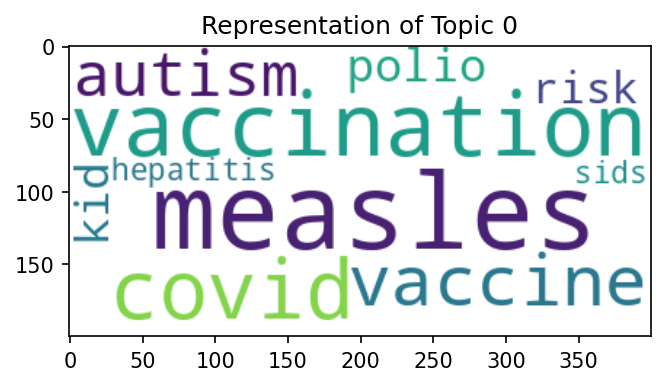

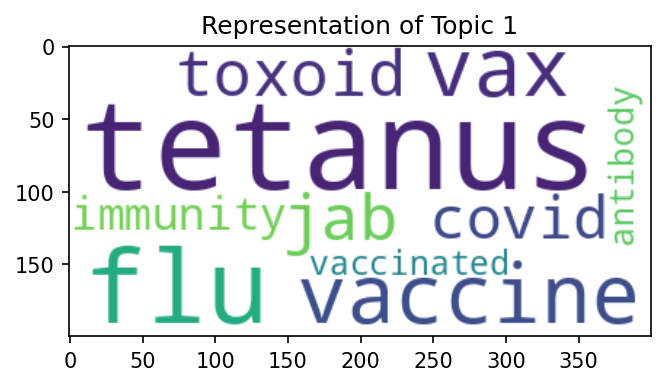

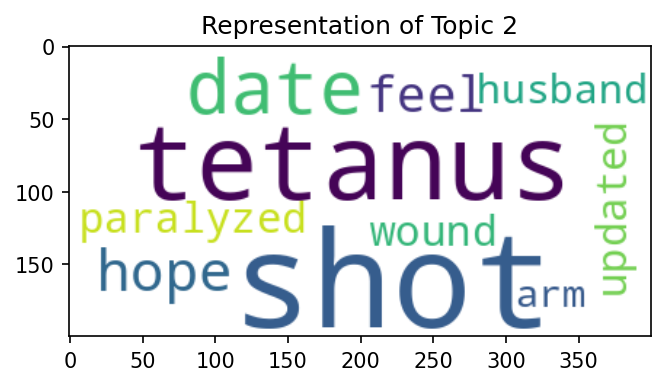

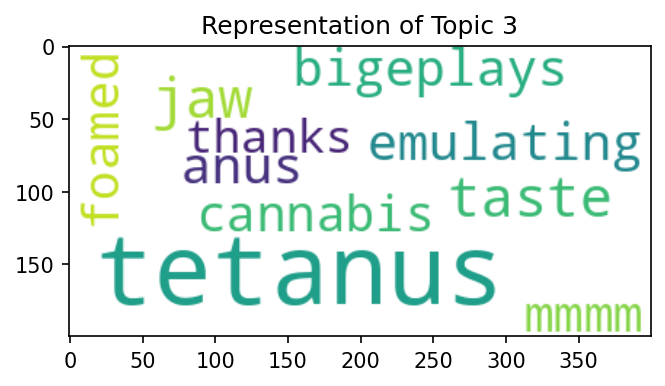

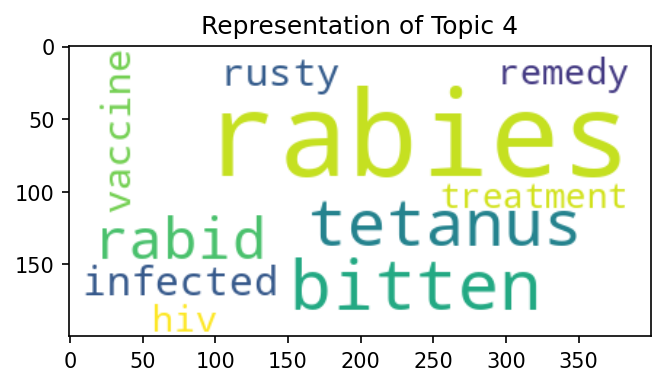

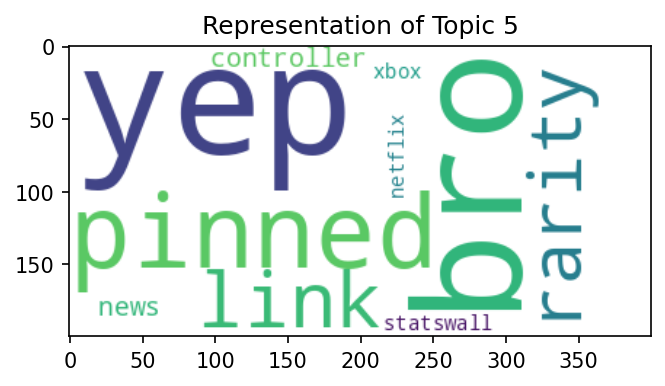

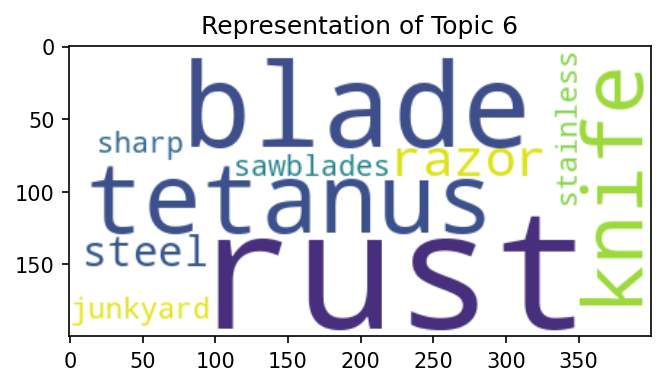

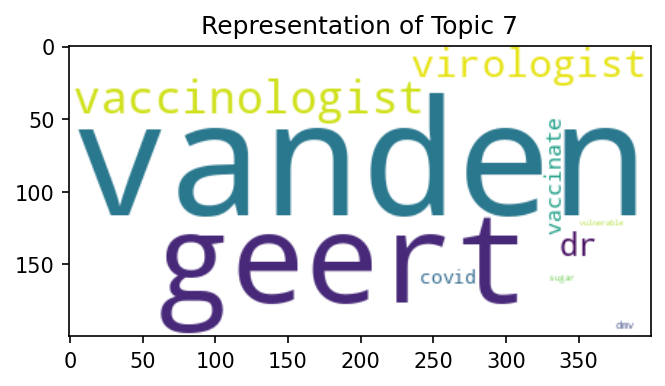

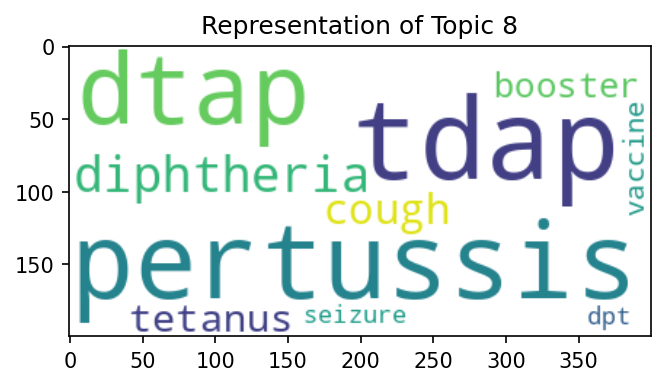

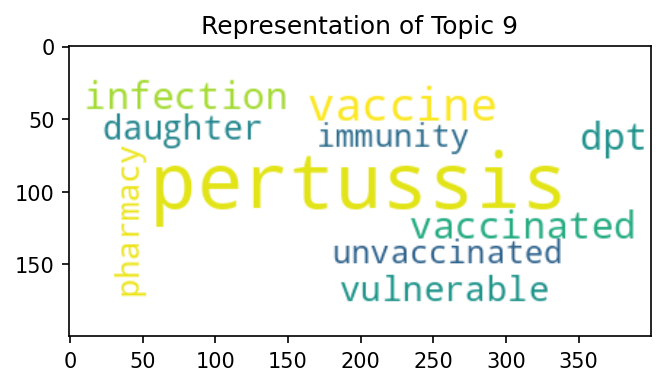

In [ ]:
#visualize the top 10 topics
for i in range(0,10):
    create_wordcloud(topic_model, topic=i)

In [ ]:
topic_model.visualize_heatmap(top_n_topics=10)

In [ ]:
# Extract hierarchical topics and their representations
hierarchical_topics = topic_model.hierarchical_topics(docs)

# Visualize these representations
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 118/118 [00:04<00:00, 27.92it/s]


In [ ]:
topics_over_time = topic_model.topics_over_time(tweet_list, timestamp, nr_bins=20)
topics_over_time

20it [00:47,  2.39s/it]


,Topic,Words,Frequency,Timestamp
0,-1,"vaccination, vaccinate, vaccine, people, morta...",321,2023-11-04 03:39:57.145999872+00:00
1,0,"infant, sids, covid, mortality, vaccine",300,2023-11-04 03:39:57.145999872+00:00
2,1,"development, claim, vaccinating, mmr, covid",1,2023-11-04 03:39:57.145999872+00:00
3,5,"checking, false, link, bro, pinned",4,2023-11-04 03:39:57.145999872+00:00
4,10,"diphtheria, reagent, bayero, hasiya, 005",4,2023-11-04 03:39:57.145999872+00:00
...,...,...,...,...
1123,110,"curse, demonic, lockjaw, bender, hakai",1,2024-03-04 20:15:14.300000+00:00
1124,112,"quicksand, soothing, coochie, aloud, joke",3,2024-03-04 20:15:14.300000+00:00
1125,116,"myocarditis, severity, cardiac, incidence, misc",2,2024-03-04 20:15:14.300000+00:00
1126,117,"britney, needle, nicki, minaj, felonie",1,2024-03-04 20:15:14.300000+00:00


In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, title = '<b>Representation of Topics over Time</b>',height = 450, width = 850)

In [ ]:

topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [ ]:
#topic_model.visualize_topics_over_time(topics_over_time, title = '<b>Representation of Topics over Time</b>', normalize_frequency= True,height = 450, width = 850)